In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [32]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [33]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [34]:
# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

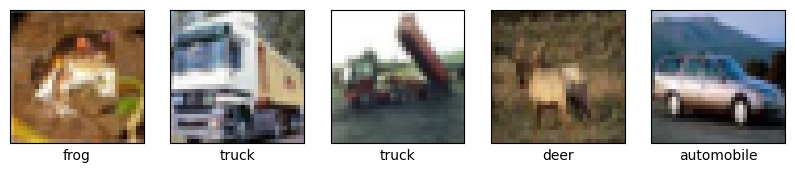

In [35]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [36]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # SparseCategoricalCrossentropy (from_logits=True) is used because we have multiple classes, and our labels are not one-hot encoded.
              metrics=['accuracy'])

In [37]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [38]:
## Create an instance of early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
# Train the model
epochs = 50
history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5250 - accuracy: 0.4451 - val_loss: 1.2486 - val_accuracy: 0.5484
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1793 - accuracy: 0.5813 - val_loss: 1.1060 - val_accuracy: 0.6141
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0315 - accuracy: 0.6360 - val_loss: 1.0365 - val_accuracy: 0.6347
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9310 - accuracy: 0.6732 - val_loss: 0.9456 - val_accuracy: 0.6675
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8527 - accuracy: 0.7004 - val_loss: 0.9609 - val_accuracy: 0.6613
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7943 - accuracy: 0.7224 - val_loss: 0.9007 - val_accuracy: 0.6949
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7490 - accuracy: 0.7395 - val_loss: 0.8666 - val_ac

In [40]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.8373 - accuracy: 0.7151 - 890ms/epoch - 3ms/step

Test accuracy: 0.7151


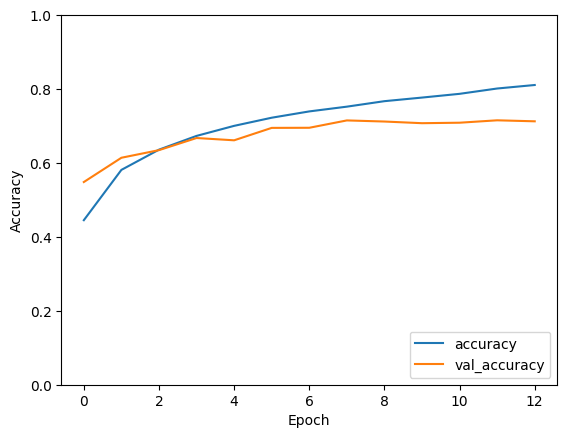

In [41]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [42]:
# Save the model
model.save("cifar10_image_classification_model.h5")



c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\machine learning\machine-learning\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# Inference on a single image

from PIL import Image
import numpy as np
def predict_single_image(model, image):
    # Resize the image to 32x32 pixels
    image = image.resize((32, 32))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image/255.0
    image = image.reshape(1, 32, 32, 3)
    # Predict the class of an image
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    return class_names[predicted_label]


single_image = 'dog.jpg'
image = Image.open(single_image)
print(f'Predcited class: {predict_single_image(model, image)}')



1/1 [==============================] - 0s 68ms/step
Predcited class: dog


In [ ]:
# Load the model (for future use)
# loaded_model = tf.keras.models.load_model("cifar10_image_classification_model.h5")